In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [4]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023.01.01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

# 결측치 생성
# 100 -200 -> NAN
data.loc[100:200, 'Value'] =np.nan

# 결측치 체크 확인
print(data.loc[100:200])


          Date     Value
0   2023-01-01 -0.181036
1   2023-01-02 -0.115288
2   2023-01-03  1.273875
3   2023-01-04 -0.669999
4   2023-01-05 -0.508168
..         ...       ...
995 2025-09-22  0.654324
996 2025-09-23  0.571846
997 2025-09-24 -1.144189
998 2025-09-25  0.332473
999 2025-09-26 -1.576501

[1000 rows x 2 columns]
          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


### 스플라인 보간법은 유요한 데이터에만 적용이 가능합니다. 그래서 결측치를 제거하거나 대처하는 작업이 필요합니다. 
-결측치 처리 (보간법 적용)

In [5]:
data['Value_filled'] = data['Value'].interpolate(method='linear')

print(data.loc[100:200])

          Date  Value  Value_filled
100 2023-04-11    NaN      0.491324
101 2023-04-12    NaN      0.488931
102 2023-04-13    NaN      0.486539
103 2023-04-14    NaN      0.484146
104 2023-04-15    NaN      0.481754
..         ...    ...           ...
196 2023-07-16    NaN      0.261643
197 2023-07-17    NaN      0.259250
198 2023-07-18    NaN      0.256858
199 2023-07-19    NaN      0.254465
200 2023-07-20    NaN      0.252073

[101 rows x 3 columns]


In [7]:
#스플라인 보간법 적용

spl = CubicSpline(data.index, data['Value_filled'])
data['Value_spline'] = spl(data.index)

print(data.loc[100:200])


          Date  Value  Value_filled  Value_spline
100 2023-04-11    NaN      0.491324      0.491324
101 2023-04-12    NaN      0.488931      0.488931
102 2023-04-13    NaN      0.486539      0.486539
103 2023-04-14    NaN      0.484146      0.484146
104 2023-04-15    NaN      0.481754      0.481754
..         ...    ...           ...           ...
196 2023-07-16    NaN      0.261643      0.261643
197 2023-07-17    NaN      0.259250      0.259250
198 2023-07-18    NaN      0.256858      0.256858
199 2023-07-19    NaN      0.254465      0.254465
200 2023-07-20    NaN      0.252073      0.252073

[101 rows x 4 columns]


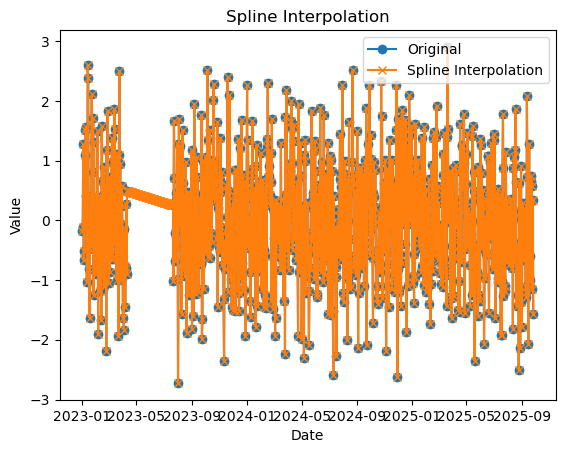

In [8]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_spline'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Spline Interpolation')
plt.legend()
plt.show()

### 스플라인 보간법 -> 연속성 있는 데이터에서 적용됩니다.
### 결측값제거하거나 다른 방법으로 대처하시고 진행해야합니다. 